In [3]:
# 1. Logistic regression is used to find out the discreate number varaition. 
# it changes its output using sigmoid function.
# 2.  Types of Logistic Regression are 
#     a. Binary Logistic Regression
#     b. Multinomial Logistic Regression
#     c. Ordinal Logistic Regression
# 3. Logistic Regression is used in classification problems.
# 4. It is used to find the probability of event success and event failure.


In [4]:
#Assumption of the logistic regression are 
# 1. The dependent variable must be categorical.
# 2. The independent variable should not have multi collinearity.
# 3. The independent variable should be linearly related to the log odds.
# 4. The sample size should be large enough.


In [6]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# FILEPATH

"""
This function calculates the common evaluation metrics used for logistic regression.

Parameters:
- y_true: The true labels of the data.
- y_pred: The predicted labels of the data.

Returns:
- accuracy: The accuracy of the model.
- precision: The precision of the model.
- recall: The recall of the model.
- f1_score: The F1 score of the model.
"""

def evaluate_logistic_regression(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    
    # Calculate F1 score
    f1_score = f1_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1_score


In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [9]:
# titanic dataset import 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
#preprocessing
df.drop(['deck'], axis = 1 , inplace = True)

#impute missing values in age and fare column 
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

#impute the missing values in embark and embark town 
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

#Encode the catergorical columns using label encoder using for loop 
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype =='object' or df[col].dtype.name == 'category':
        df[col] = label.fit_transform(df[col])

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [13]:
# select X and y for the train test split 
X = df.drop('survived', axis = 1)
y = df['survived']


In [14]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)



In [15]:
#Call the model 
model = LogisticRegression()


In [16]:
#train the model 
model.fit(X_train, y_train)


c:\Users\s\miniconda3\envs\python_eda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#predict the values 
y_pred = model.predict(X_test)


In [20]:
#evaluate the model 
print('accuracy:' , accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('confusion_matrix:', confusion_matrix(y_test, y_pred))
print('classification_report:', classification_report(y_test, y_pred))


accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
confusion_matrix: [[105   0]
 [  0  74]]
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



<Axes: >

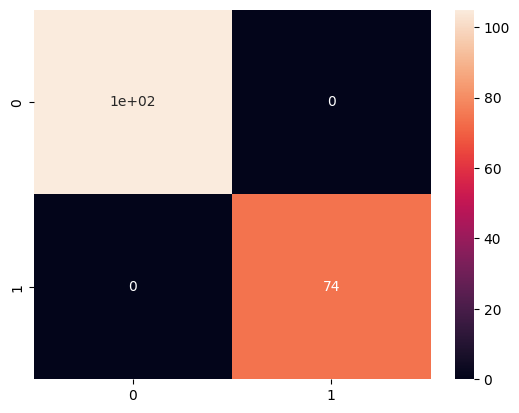

In [21]:
#plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [22]:
#save the model as pickle file 
import pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)